voir les colonnes

In [3]:
import os
import pandas as pd

# Chemin du dossier contenant les fichiers
dossier = r"C:\Users\natha\Downloads\data\data"

# Récupération de tous les fichiers (même sans extension .csv)
fichiers = [f for f in os.listdir(dossier) if os.path.isfile(os.path.join(dossier, f))]
fichiers.sort()

# On limite à 50 fichiers max
fichiers = fichiers[:50]

lignes = []

for fichier in fichiers:
    ancien_chemin = os.path.join(dossier, fichier)
    
    # Si le fichier n'a pas d'extension .csv, on lui en ajoute une copie renommée
    if not fichier.lower().endswith(".csv"):
        nouveau_nom = fichier + ".csv"
        nouveau_chemin = os.path.join(dossier, nouveau_nom)
        os.rename(ancien_chemin, nouveau_chemin)
        fichier = nouveau_nom
        chemin = nouveau_chemin
    else:
        chemin = ancien_chemin
    
    try:
        # Lire uniquement la 5e ligne (index 4, pandas commence à 0)
        ligne = pd.read_csv(chemin, skiprows=3, nrows=1)
        
        # Ajouter le nom du fichier comme référence
        ligne["fichier"] = fichier
        
        lignes.append(ligne)
    except Exception as e:
        print(f"Erreur avec {fichier} : {e}")

# Concaténer toutes les lignes
if lignes:
    resultat = pd.concat(lignes, ignore_index=True)
    print(resultat)
    
    # Sauvegarder le résultat concaténé
    resultat.to_csv(os.path.join(dossier, "concat_ligne5.csv"), index=False)
    print("\nRésultat sauvegardé dans 'concat_ligne5.csv'")
else:
    print("Aucune ligne récupérée.")


    Unnamed: 0 dioxyde d azote dioxyde de soufre monoxyde d azote  \
0          NaN             NO2               SO2               NO   
1          NaN             NO2               NaN               NO   
2          NaN             NaN               NaN              NaN   
3          NaN             NO2               NaN               NO   
4          NaN             NO2               NaN               NO   
5          NaN             NO2               NaN               NO   
6          NaN             NaN               NaN              NaN   
7          NaN             NaN               NaN              NaN   
8          NaN             NO2               NaN               NO   
9          NaN             NO2               SO2               NO   
10         NaN             NO2               NaN               NO   
11         NaN             NO2               SO2               NO   
12         NaN             NO2               NaN               NO   
13         NaN             NO2    

tri des datasets utile

fichier utiliser pour la prediction

In [6]:
import os

# Chemin du dossier
dossier = r"C:\Users\natha\Downloads\data\data"

# Récupération des fichiers
fichiers = [f for f in os.listdir(dossier) if os.path.isfile(os.path.join(dossier, f))]
fichiers.sort()

# On limite à 50 fichiers
fichiers = fichiers[:50]

# Ligne cible (ici 5 en comptant depuis le début du fichier)
ligne_numero = 5  

lignes = []

for fichier in fichiers:
    chemin = os.path.join(dossier, fichier)
    try:
        with open(chemin, "r", encoding="utf-8", errors="ignore") as f:
            contenu = f.readlines()
            
            if len(contenu) >= ligne_numero:
                # On récupère la ligne brute (strip pour enlever \n)
                ligne = contenu[ligne_numero - 1].strip()
                # On ajoute le nom du fichier pour référence
                lignes.append(f"{fichier};{ligne}")
            else:
                print(f"{fichier} : pas assez de lignes")
    except Exception as e:
        print(f"Erreur avec {fichier} : {e}")

# Résultat concaténé
if lignes:
    print(" Ligne 5 extraite de chaque fichier :\n")
    for l in lignes:
        print(l)

    # Sauvegarde dans un fichier texte
    sortie = os.path.join(dossier, "concat_ligne5.csv")
    with open(sortie, "w", encoding="utf-8") as f:
        f.write("\n".join(lignes))
    
    print(f"\n Résultat sauvegardé dans {sortie}")
else:
    print(" Aucune ligne extraite.")


 Ligne 5 extraite de chaque fichier :

1.csv;,NO2,SO2,NO,NOX,O3
10.csv;,NO2,NO,NOX
11.csv;,PM10,PM25,O3
12.csv;,PM10,NO2,NO
13.csv;,PM10,PM25,NO2,NO,NOX
14.csv;,PM10,PM25,NO2,NO,NOX
15.csv;,PM10,PM25,O3
16.csv;,PM25,O3
17.csv;,NO2,NO,NOX
18.csv;,NO2,SO2,NO,NOX,O3
19.csv;,PM10,PM25,NO2,NO,NOX
2.csv;,PM25,NO2,SO2,NO,NOX,O3
20.csv;,PM10,NO2,NO,NOX
21.csv;,NO2,NO,NOX,O3
22.csv;,NO2,NO,NOX
23.csv;,PM10,PM25,NO2,NO,NOX
24.csv;,O3
25.csv;,NO2,NO,NOX,O3
26.csv;,PM10,PM25,NO2,NO,NOX
27.csv;,PM10,PM25,NO2,SO2,ETBEN,m+pXYL,NO,oXYL,NOX,TOL
28.csv;,CO,PM10,PM25,NO2,NO,NOX
29.csv;,PM10
3.csv;,PM10,PM25,NO2,SO2,NO,NOX,O3
30.csv;,PM10,NO2,NO,NOX,O3
31.csv;,PM10,NO2,NO,NOX,O3
32.csv;,NO2,NO,NOX
33.csv;,O3
34.csv;,PM10,O3
35.csv;,O3
36.csv;,PM25,NO2,NO,NOX
37.csv;,NO2,NO,NOX,O3
38.csv;,NO2,NO,NOX
39.csv;,PM25,NO2,NO,NOX
4.csv;,PM10,NO2,NO,NOX
40.csv;,NO2,NO,NOX,O3
41.csv;,NO2,NO,NOX,O3
42.csv;,NO2,NO,O3
43.csv;,PM10,NO2,NO,NOX
44.csv;,NO2,NO,NOX
45.csv;,PM10,PM25,PM25
46.csv;,CO,PM10,PM25,NO2,NO,NOX,O3


In [8]:
import os
import shutil

# Chemin du dossier d'origine contenant les fichiers
dossier_origine = r"C:\Users\natha\Downloads\data\data"

# Nouveau dossier où tu veux copier les fichiers
dossier_nouveau = r"C:\Users\natha\Desktop\efrei\m2\air_polution\fichier_bon"

# Liste des fichiers à copier
fichiers_a_copier = ["3.csv", "6.csv", "13.csv", "14.csv", "19.csv", "26.csv", "28.csv", "50.csv"]

# Créer le nouveau dossier s'il n'existe pas
os.makedirs(dossier_nouveau, exist_ok=True)

# Copier les fichiers
for fichier in fichiers_a_copier:
    chemin_source = os.path.join(dossier_origine, fichier)
    chemin_destination = os.path.join(dossier_nouveau, fichier)
    try:
        shutil.copy2(chemin_source, chemin_destination)
        print(f"{fichier} copié ✅")
    except Exception as e:
        print(f"Erreur pour {fichier} : {e}")

print(f"\n Tous les fichiers sélectionnés ont été copiés dans {dossier_nouveau}")


3.csv copié ✅
6.csv copié ✅
13.csv copié ✅
14.csv copié ✅
19.csv copié ✅
26.csv copié ✅
28.csv copié ✅
50.csv copié ✅

 Tous les fichiers sélectionnés ont été copiés dans C:\Users\natha\Desktop\efrei\m2\air_polution\fichier_bon


changer le nom des fichiers vers le nom de leurs villes

In [14]:
import os
import csv

dossier = r"C:\Users\natha\Desktop\efrei\m2\air_polution\fichier_bon"

for fichier in os.listdir(dossier):
    chemin = os.path.join(dossier, fichier)
    
    if os.path.isfile(chemin):
        try:
            with open(chemin, "r", encoding="utf-8", errors="ignore") as f:
                reader = csv.reader(f)
                premiere_ligne = next(reader, None)
                
                if premiere_ligne and premiere_ligne[0].strip():
                    nouveau_nom_base = premiere_ligne[0].strip()
                else:
                    # Nom par défaut si première cellule vide
                    nouveau_nom_base = os.path.splitext(fichier)[0] + "_renomme"
                
                nouveau_nom = nouveau_nom_base + ".csv"
                nouveau_chemin = os.path.join(dossier, nouveau_nom)
                
                # Gérer doublons
                compteur = 1
                while os.path.exists(nouveau_chemin):
                    nouveau_nom = f"{nouveau_nom_base}_{compteur}.csv"
                    nouveau_chemin = os.path.join(dossier, nouveau_nom)
                    compteur += 1
                
                os.rename(chemin, nouveau_chemin)
                print(f"{fichier} → {nouveau_nom}")
        except PermissionError:
            print(f" Fichier ouvert ailleurs : {fichier}")
        except Exception as e:
            print(f"Erreur avec {fichier} : {e}")


 Fichier ouvert ailleurs : 13.csv
 Fichier ouvert ailleurs : 14.csv
 Fichier ouvert ailleurs : 19.csv
 Fichier ouvert ailleurs : 26.csv
 Fichier ouvert ailleurs : 28.csv
 Fichier ouvert ailleurs : 3.csv
 Fichier ouvert ailleurs : 50.csv
 Fichier ouvert ailleurs : 6.csv


concatener tous les fichiers

In [17]:
import os
import pandas as pd

# Dossier contenant les fichiers nettoyés
dossier = r"C:\Users\natha\Desktop\efrei\m2\air_polution\fichier_bon"

# Liste pour stocker les DataFrames
dfs = []

for fichier in os.listdir(dossier):
    chemin = os.path.join(dossier, fichier)
    
    if os.path.isfile(chemin):
        try:
            df = pd.read_csv(chemin)
            
            # Ajouter une colonne 'ville' avec le nom du fichier (sans extension)
            nom_ville = os.path.splitext(fichier)[0]
            df['ville'] = nom_ville
            
            dfs.append(df)
            print(f"{fichier} traité ✅")
        except Exception as e:
            print(f"Erreur avec {fichier}: {e}")

# Concaténer tous les fichiers verticalement
if dfs:
    resultat = pd.concat(dfs, ignore_index=True)
    
    # Sauvegarde
    sortie = os.path.join(dossier, "concat_villes.csv")
    resultat.to_csv(sortie, index=False)
    print(f"\n Tous les fichiers concaténés. Résultat sauvegardé dans : {sortie}")
else:
    print(" Aucun fichier traité.")


Autoroute A1 - Saint-Denis.csv traité ✅
Avenue des Champs Elysées.csv traité ✅
Boulevard Haussmann.csv traité ✅
Boulevard Périphérique Est.csv traité ✅
GENNEVILLIERS.csv traité ✅
PARIS 18ème.csv traité ✅
Route Nationale 6 - MELUN.csv traité ✅

 Tous les fichiers concaténés. Résultat sauvegardé dans : C:\Users\natha\Desktop\efrei\m2\air_polution\fichier_bon\concat_villes.csv


nettoyage sur la colonne time

In [ ]:
import pandas as pd
import os

# Chemin du fichier CSV
chemin_fichier = r"C:\Users\natha\Desktop\efrei\m2\air_polution\fichier_bon\concat_villes_clean.csv"

# Lire le fichier
df = pd.read_csv(chemin_fichier)

# Vérifier que la colonne 'time' existe
if 'time' in df.columns:
    # Convertir la colonne 'time' en datetime en spécifiant le format exact
    df['time'] = pd.to_datetime(df['time'], format="%Y-%m-%d %H:%M:%SZ", errors='coerce')
    
    # Créer les nouvelles colonnes
    df['annee'] = df['time'].dt.year
    df['mois'] = df['time'].dt.month
    df['jour'] = df['time'].dt.day
    df['heure'] = df['time'].dt.hour
    
    # Supprimer la colonne 'time' originale
    df.drop(columns=['time'], inplace=True)

# Sauvegarder le fichier modifié
sortie = os.path.join(os.path.dirname(chemin_fichier), "concat_villes_time_split.csv")
df.to_csv(sortie, index=False)

print(f"Colonnes 'annee', 'mois', 'jour', 'heure' créées et fichier sauvegardé dans {sortie}")


Colonne 'time' supprimée. Fichier sauvegardé dans C:\Users\natha\Desktop\efrei\m2\air_polution\fichier_bon\concat_villes_clean_no_time.csv


creation des colonnes jour anne mois

In [23]:
import pandas as pd
import os

# Chemin du fichier CSV
chemin_fichier = r"fichier_bon/concat_villes_clean_no_time.csv"

# Lire le fichier
df = pd.read_csv(chemin_fichier)

# Vérifier que la colonne 'time' existe
if 'time' in df.columns:
    # Convertir la colonne 'time' en datetime en spécifiant le format exact
    df['time'] = pd.to_datetime(df['time'], format="%Y-%m-%d %H:%M:%SZ", errors='coerce')
    
    # Créer les nouvelles colonnes
    df['annee'] = df['time'].dt.year
    df['mois'] = df['time'].dt.month
    df['jour'] = df['time'].dt.day
    df['heure'] = df['time'].dt.hour
    
    # Supprimer la colonne 'time' originale
    df.drop(columns=['time'], inplace=True)

# Sauvegarder le fichier modifié
sortie = os.path.join(os.path.dirname(chemin_fichier), "concat_villes_time_split.csv")
df.to_csv(sortie, index=False)

print(f"Colonnes 'annee', 'mois', 'jour', 'heure' créées et fichier sauvegardé dans {sortie}")


Colonnes 'annee', 'mois', 'jour', 'heure' créées et fichier sauvegardé dans fichier_bon\concat_villes_time_split.csv


suppression des vides

In [26]:
import pandas as pd
import os

# Chemin du fichier CSV
chemin_fichier = r"C:\Users\natha\Desktop\efrei\m2\air_polution\fichier_bon\concat_villes_time_split.csv"

# Dossier final pour sauvegarde
dossier_final = r"C:\Users\natha\Desktop\efrei\m2\air_polution\fichier_bon\final"
os.makedirs(dossier_final, exist_ok=True)

# Lire le fichier
df = pd.read_csv(chemin_fichier)

# Liste des colonnes à supprimer
colonnes_a_supprimer = ['Unnamed: 8']

# Supprimer les colonnes
df.drop(columns=colonnes_a_supprimer, inplace=True, errors='ignore')

# Sauvegarder le fichier dans le dossier 'final'
sortie = os.path.join(dossier_final, "concat_villes_final.csv")
df.to_csv(sortie, index=False)

print(f"Colonnes supprimées et fichier sauvegardé dans {sortie}")


Colonnes supprimées et fichier sauvegardé dans C:\Users\natha\Desktop\efrei\m2\air_polution\fichier_bon\final\concat_villes_final.csv


calculer aqi

In [2]:
import pandas as pd
import numpy as np

# Chemin du CSV
chemin_csv = r"C:\Users\natha\Desktop\efrei\m2\air_polution\fichier_bon\final\concat_villes_final.csv"

# Lire le CSV
df = pd.read_csv(chemin_csv)

# Convertir les colonnes polluants en float pour éviter les erreurs
polluants = ['CO', 'PM10', 'PM25', 'NO2', 'NO', 'NOX']
for col in polluants:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # transforme en float, NaN si impossible

# Définir les intervalles AQI (exemple US EPA)
aqi_breakpoints = {
    'PM25': [(0, 12, 0, 50),
             (12.1, 35.4, 51, 100),
             (35.5, 55.4, 101, 150),
             (55.5, 150.4, 151, 200)],
    'PM10': [(0, 54, 0, 50),
             (55, 154, 51, 100),
             (155, 254, 101, 150),
             (255, 354, 151, 200)],
    'CO': [(0, 4.4, 0, 50),
           (4.5, 9.4, 51, 100),
           (9.5, 12.4, 101, 150)],
    'NO2': [(0, 53, 0, 50),
            (54, 100, 51, 100),
            (101, 360, 101, 150)],
    'NO': [(0, 53, 0, 50),
           (54, 100, 51, 100),
           (101, 360, 101, 150)],
    'NOX': [(0, 53, 0, 50),
            (54, 100, 51, 100),
            (101, 360, 101, 150)]
}

# Fonction pour calculer AQI d'un polluant
def calcul_aqi(val, breakpoints):
    val = float(val)  # convertir en float
    for c_lo, c_hi, i_lo, i_hi in breakpoints:
        if val >= c_lo and val <= c_hi:
            return (i_hi - i_lo) / (c_hi - c_lo) * (val - c_lo) + i_lo
    return np.nan

# Calcul AQI ligne par ligne
aqi_lignes = []
for i, row in df.iterrows():
    aqi_polluants = []
    for pollutant in polluants:
        val = row.get(pollutant, np.nan)
        if pd.notna(val):
            aqi_polluants.append(calcul_aqi(val, aqi_breakpoints[pollutant]))
    aqi_lignes.append(max(aqi_polluants) if aqi_polluants else np.nan)

# Ajouter colonne AQI
df['AQI'] = aqi_lignes

# Sauvegarder
sortie = chemin_csv.replace(".csv", "_with_AQI.csv")
df.to_csv(sortie, index=False)

print(f" AQI calculé et sauvegardé dans {sortie}")


 AQI calculé et sauvegardé dans C:\Users\natha\Desktop\efrei\m2\air_polution\fichier_bon\final\concat_villes_final_with_AQI.csv


determiner si un jour est un weekend oui ou non

In [5]:
import pandas as pd

# Charger ton fichier
df = pd.read_csv(r"C:\Users\natha\Desktop\efrei\m2\air_polution\fichier_bon\final\donnees_pollution_avec_meteo.csv")

# Renommer pour correspondre aux attentes de pandas
df = df.rename(columns={"annee": "year", "mois": "month", "jour": "day"})

# Construire une colonne datetime
df["date"] = pd.to_datetime(df[["year", "month", "day"]])

# Ajouter la colonne weekend
df["weekend"] = df["date"].dt.dayofweek.isin([5, 6]).astype(int)

# Sauvegarder
df.to_csv(r"C:\Users\natha\Desktop\efrei\m2\air_polution\fichier_bon\final\donnees_pollution_avec_weekend.csv", index=False)


tri sur les valeurs aqi plein uniquement

In [6]:
import pandas as pd

# Charger ton fichier CSV
df = pd.read_csv(r"C:\Users\natha\Desktop\efrei\m2\air_polution\fichier_bon\final\donnees_pollution_avec_weekend.csv")

# Supprimer les lignes où AQI est vide
df = df.dropna(subset=["AQI"])

# Sauvegarder le nouveau fichier
df.to_csv(r"C:\Users\natha\Desktop\efrei\m2\air_polution\fichier_bon\final\donnees_pollution_sans_AQI_vide.csv", index=False)


visuel

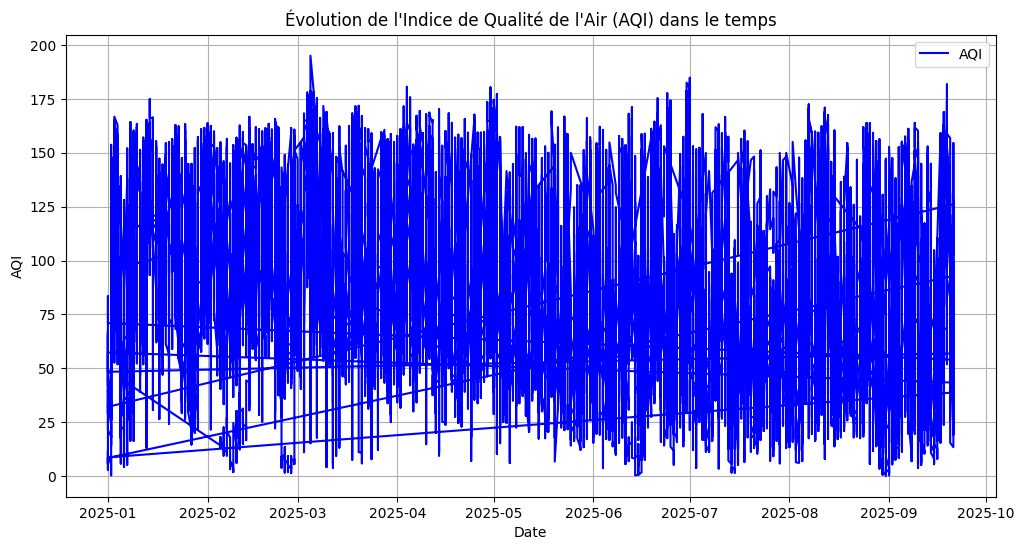

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données
df = pd.read_csv(r"C:\Users\natha\Desktop\efrei\m2\air_polution\fichier_bon\final\donnees_pollution_sans_AQI_vide.csv")

# Construire une date complète
df["date"] = pd.to_datetime(df["year"].astype(int).astype(str) + "-" +
                            df["month"].astype(int).astype(str) + "-" +
                            df["day"].astype(int).astype(str))

# Tracer l’évolution de l’AQI dans le temps
plt.figure(figsize=(12,6))
plt.plot(df["date"], df["AQI"], label="AQI", color="blue")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.title("Évolution de l'Indice de Qualité de l'Air (AQI) dans le temps")
plt.legend()
plt.grid(True)
plt.show()


comparaison aqi entre jour de semaine et weekend

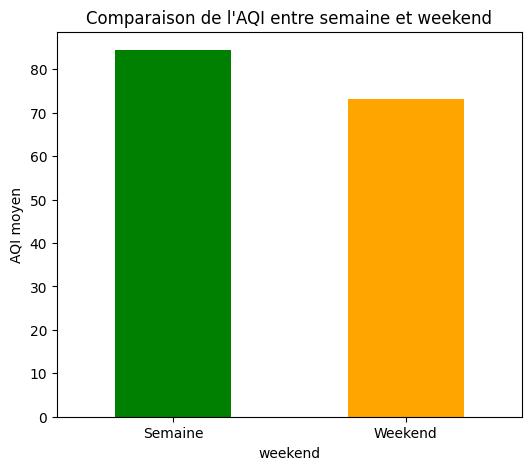

In [9]:
# Calcul de la moyenne AQI en semaine vs weekend
df["weekend"] = df["date"].dt.dayofweek.isin([5,6]).astype(int)  # 1 = weekend, 0 = semaine
moyennes = df.groupby("weekend")["AQI"].mean()

# Tracer un graphique à barres
plt.figure(figsize=(6,5))
moyennes.plot(kind="bar", color=["green","orange"])
plt.xticks([0,1], ["Semaine", "Weekend"], rotation=0)
plt.ylabel("AQI moyen")
plt.title("Comparaison de l'AQI entre semaine et weekend")
plt.show()
